In [4]:
import pandas as pd

splits = {'train': 'data/train.parquet', 'validation': 'data/validation.parquet', 'test': 'data/test.parquet'}
df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits["train"])

df.head()

,text,image
0,put down a resolution on the subject,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,and he is to be backed by Mr. Will,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,nominating any more Labour life Peers,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,M Ps tomorrow. Mr. Michael Foot has,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,"Griffiths, M P for Manchester Exchange .",{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [5]:
df.shape

(6482, 2)

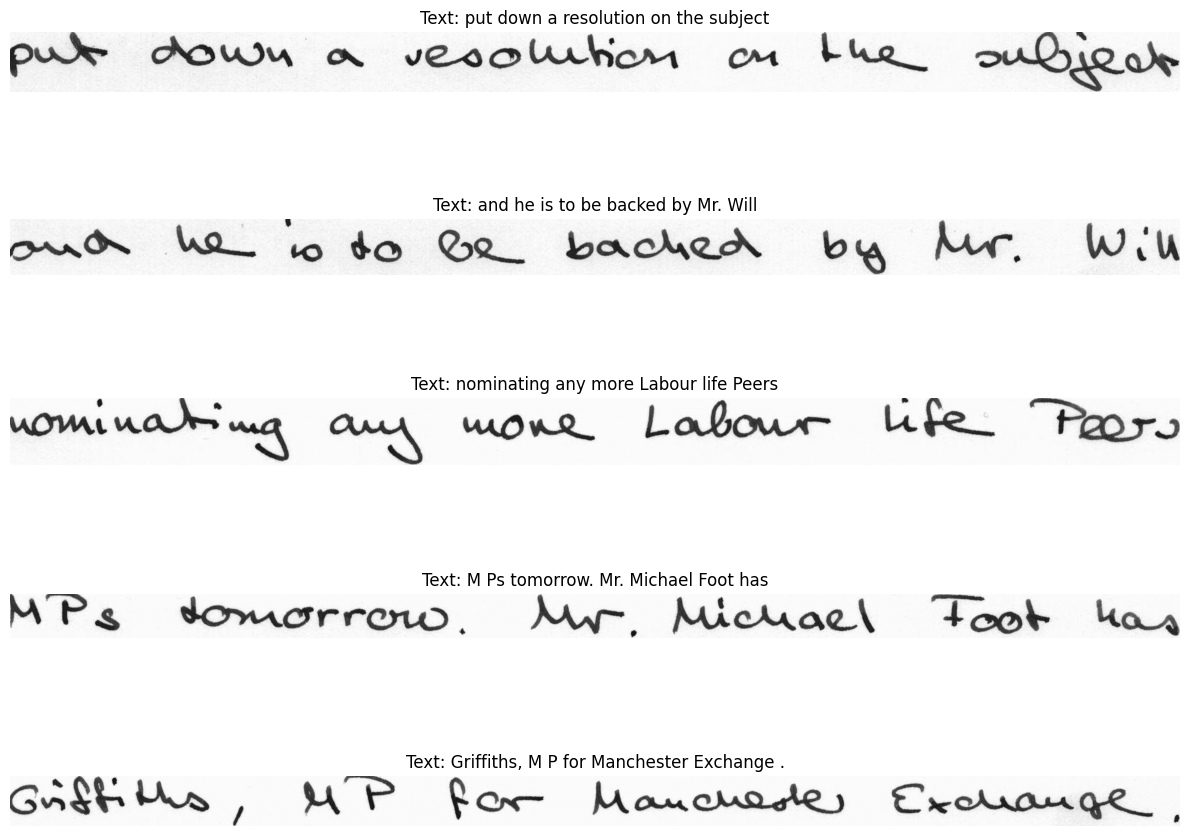

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np

# Try to load the data (if you have access issues, I'll provide alternatives below)
try:
    splits = {'train': 'data/train.parquet', 'validation': 'data/validation.parquet', 'test': 'data/test.parquet'}
    df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits["train"])
except Exception as e:
    print(f"Error loading data: {e}")
    print("Trying alternative loading method...")

# Function to display images from bytes
def display_images(df, num_samples=5):
    """Display images from the dataframe with their corresponding text"""
    fig, axes = plt.subplots(num_samples, 1, figsize=(12, num_samples*2))
    
    for i, (idx, row) in enumerate(df.iloc[:num_samples].iterrows()):
        if i >= num_samples:
            break
            
        # Extract image bytes
        img_bytes = row['image']['bytes']
        
        # Convert bytes to image
        img = Image.open(io.BytesIO(img_bytes))
        
        # Display image
        axes[i].imshow(np.array(img), cmap='gray')
        axes[i].set_title(f"Text: {row['text']}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display the first 5 images
display_images(df, 5)

Saving 100 images to C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines...
Saved 10 images...
Saved 20 images...
Saved 30 images...
Saved 40 images...
Saved 50 images...
Saved 60 images...
Saved 70 images...
Saved 80 images...
Saved 90 images...
Saved 100 images...
Saved metadata for 100 images to C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines\iam_lines_metadata.csv

Sample of saved metadata:
   id                image_path                                      text  \
0   0  images\iam_line_0000.png      put down a resolution on the subject   
1   1  images\iam_line_0001.png        and he is to be backed by Mr. Will   
2   2  images\iam_line_0002.png     nominating any more Labour life Peers   
3   3  images\iam_line_0003.png       M Ps tomorrow. Mr. Michael Foot has   
4   4  images\iam_line_0004.png  Griffiths, M P for Manchester Exchange .   

   original_id  
0            0  
1            1  
2            2  
3            3  
4            4  


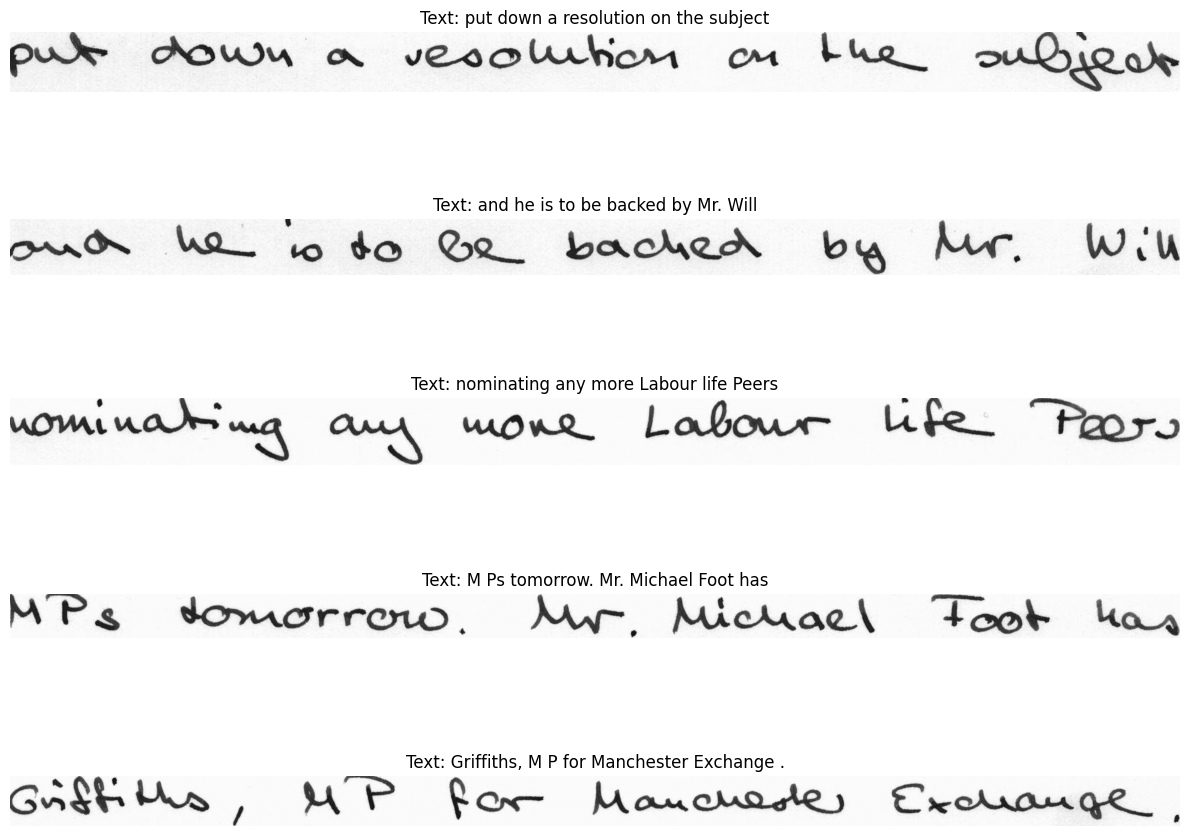

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np
import os

# Create output directory
output_dir = "C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, "images"), exist_ok=True)

# Load the dataset
try:
    splits = {'train': 'data/train.parquet', 'validation': 'data/validation.parquet', 'test': 'data/test.parquet'}
    df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits["train"])
except Exception as e:
    print(f"Error loading data: {e}")
    print("Trying alternative loading method...")
    # Add alternative loading code here if needed

# Function to save images
def save_images(df, output_dir, num_samples=100):
    """Save images from the dataframe to local disk"""
    print(f"Saving {num_samples} images to {output_dir}...")
    
    # Create a list to store metadata
    metadata = []
    
    # Iterate through the rows
    for i, (idx, row) in enumerate(df.iloc[:num_samples].iterrows()):
        if i >= num_samples:
            break
            
        # Extract image bytes
        img_bytes = row['image']['bytes']
        
        # Convert bytes to image
        img = Image.open(io.BytesIO(img_bytes))
        
        # Create filename
        filename = f"iam_line_{i:04d}.png"
        filepath = os.path.join(output_dir, "images", filename)
        
        # Save image
        img.save(filepath)
        
        # Add metadata
        metadata.append({
            'id': i,
            'image_path': os.path.join("images", filename),
            'text': row['text'],
            'original_id': idx
        })
        
        # Print progress
        if (i + 1) % 10 == 0:
            print(f"Saved {i + 1} images...")
    
    # Create DataFrame from metadata
    metadata_df = pd.DataFrame(metadata)
    
    # Save metadata to CSV
    metadata_df.to_csv(os.path.join(output_dir, "iam_lines_metadata.csv"), index=False)
    print(f"Saved metadata for {len(metadata_df)} images to {os.path.join(output_dir, 'iam_lines_metadata.csv')}")
    
    return metadata_df

# Save the first 100 images
metadata_df = save_images(df, output_dir, num_samples=100)

# Display a few examples of what was saved
print("\nSample of saved metadata:")
print(metadata_df.head())

# Show sample images
def display_saved_images(metadata_df, num_samples=5):
    """Display a few of the saved images"""
    fig, axes = plt.subplots(num_samples, 1, figsize=(12, num_samples*2))
    
    for i, (_, row) in enumerate(metadata_df.iloc[:num_samples].iterrows()):
        if i >= num_samples:
            break
            
        # Load image
        img_path = os.path.join(output_dir, row['image_path'])
        img = Image.open(img_path)
        
        # Display image
        axes[i].imshow(np.array(img), cmap='gray')
        axes[i].set_title(f"Text: {row['text']}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display 5 of the saved images
display_saved_images(metadata_df, num_samples=5)

Creating directory structure...


Creating directories: 100%|██████████| 3/3 [00:00<00:00, 437.99it/s]



Processing dataset splits...


Dataset splits:   0%|          | 0/3 [00:00<?, ?it/s]

Processing train split...
Loading train data...


c:\Users\kani1\Desktop\IE643\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded train split with 6482 samples


Saving train images: 100%|██████████| 6482/6482 [08:29<00:00, 12.72it/s]


Creating metadata dataframe for train...
Saved metadata for 6482 images to C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines\train\train_metadata.csv


Dataset splits:  33%|███▎      | 1/3 [09:02<18:05, 542.81s/it]

Processing validation split...
Loading validation data...
Loaded validation split with 976 samples


Dataset splits:  67%|██████▋   | 2/3 [10:42<04:42, 282.38s/it]

Creating metadata dataframe for validation...
Saved metadata for 976 images to C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines\validation\validation_metadata.csv
Processing test split...
Loading test data...
Loaded test split with 2915 samples


Dataset splits: 100%|██████████| 3/3 [15:40<00:00, 289.14s/it]

Creating metadata dataframe for test...
Saved metadata for 2915 images to C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines\test\test_metadata.csv


Dataset splits: 100%|██████████| 3/3 [15:40<00:00, 313.36s/it]



Combining metadata from all splits...
Saved combined metadata with 10373 entries to C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines\combined_metadata.csv

Dataset Statistics:
  train: 6482 images
  validation: 976 images
  test: 2915 images

Preparing visualization...

Loading sample images for display...


Loading test samples: 100%|██████████| 2/2 [00:00<00:00, 23.67it/s]


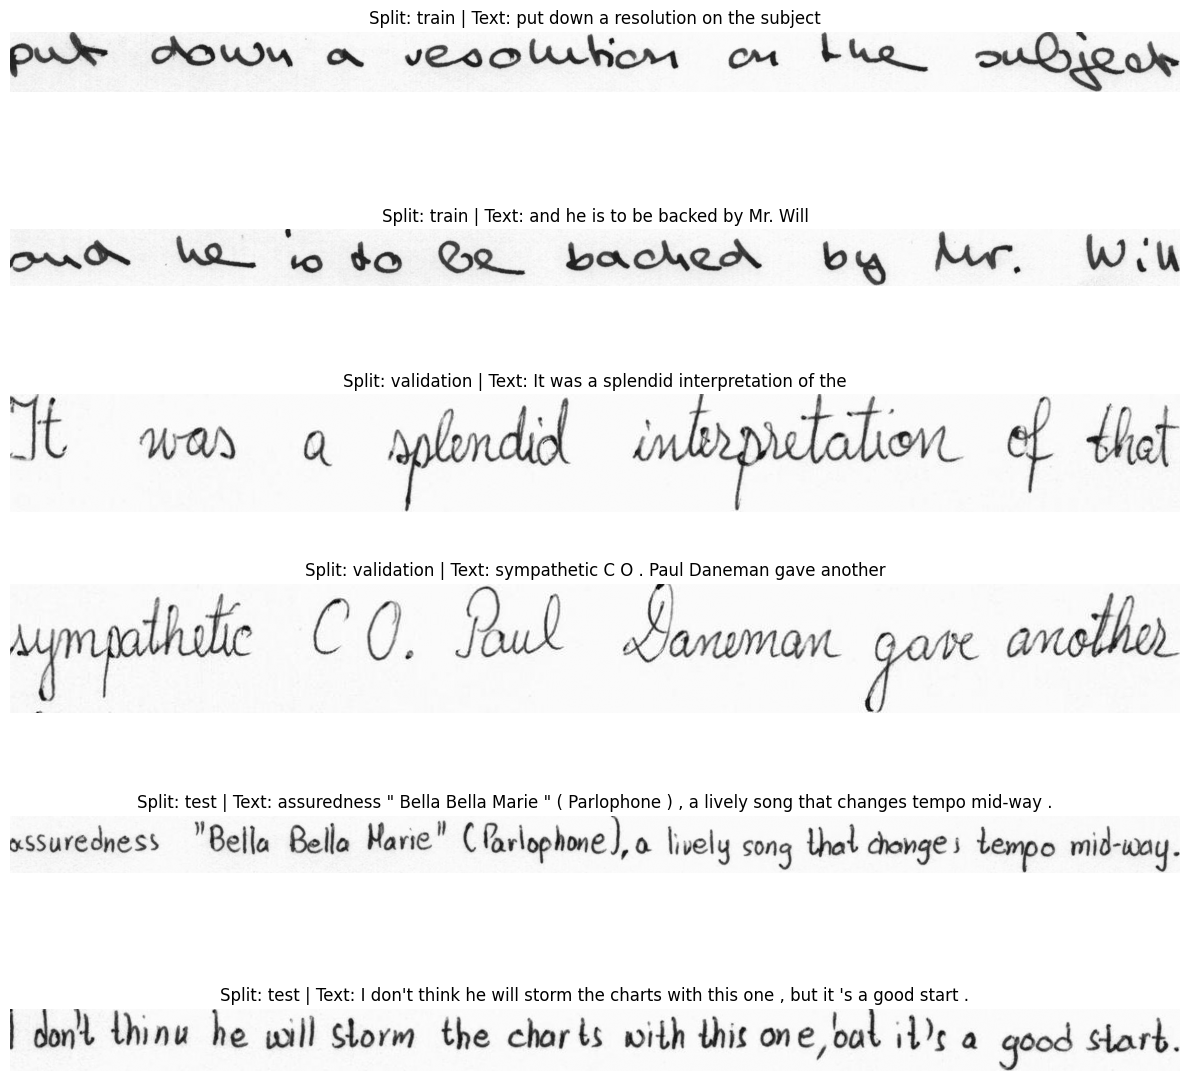

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np
import os
from tqdm import tqdm  # For progress bars

# Create output directory
base_output_dir = "C:/Users/kani1/Desktop/IE643/custom-dataset/iam-handwritten-lines"

# Create subdirectories for each split
splits = {'train': 'data/train.parquet', 'validation': 'data/validation.parquet', 'test': 'data/test.parquet'}

# Create directories with progress bar
print("Creating directory structure...")
for split in tqdm(splits, desc="Creating directories"):
    os.makedirs(os.path.join(base_output_dir, split, "images"), exist_ok=True)

# Function to save images from a specific split
def save_split_images(split_name, output_dir):
    """Save all images from a specific dataset split"""
    print(f"Processing {split_name} split...")
    
    try:
        # Load the specific split
        print(f"Loading {split_name} data...")
        df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits[split_name])
        print(f"Loaded {split_name} split with {len(df)} samples")
        
        # Create a list to store metadata
        metadata = []
        
        # Use tqdm for a progress bar
        for i, (idx, row) in enumerate(tqdm(df.iterrows(), total=len(df), desc=f"Saving {split_name} images")):
            # Extract image bytes
            img_bytes = row['image']['bytes']
            
            # Convert bytes to image
            img = Image.open(io.BytesIO(img_bytes))
            
            # Create filename - use original index as part of the name to ensure uniqueness
            filename = f"{split_name}_line_{i:05d}.png"
            filepath = os.path.join(output_dir, "images", filename)
            
            # Save image
            img.save(filepath)
            
            # Add metadata - only store filename, not the path
            metadata.append({
                'id': i,
                'filename': filename,
                'text': row['text'],
                'original_id': idx,
                'split': split_name
            })
        
        # Create DataFrame from metadata
        print(f"Creating metadata dataframe for {split_name}...")
        metadata_df = pd.DataFrame(metadata)
        
        # Save metadata to CSV
        metadata_csv_path = os.path.join(output_dir, f"{split_name}_metadata.csv")
        metadata_df.to_csv(metadata_csv_path, index=False)
        print(f"Saved metadata for {len(metadata_df)} images to {metadata_csv_path}")
        
        return metadata_df
        
    except Exception as e:
        print(f"Error processing {split_name} split: {str(e)}")
        return None

# Process each split
metadata_dfs = {}
print("\nProcessing dataset splits...")
for split in tqdm(splits, desc="Dataset splits"):
    split_output_dir = os.path.join(base_output_dir, split)
    metadata_dfs[split] = save_split_images(split, split_output_dir)

# Combine all metadata into a single file
print("\nCombining metadata from all splits...")
valid_dfs = [df for df in metadata_dfs.values() if df is not None]
combined_metadata = pd.concat(valid_dfs)
combined_metadata_path = os.path.join(base_output_dir, "combined_metadata.csv")
combined_metadata.to_csv(combined_metadata_path, index=False)
print(f"Saved combined metadata with {len(combined_metadata)} entries to {combined_metadata_path}")

# Display statistics
print("\nDataset Statistics:")
for split in splits:
    if metadata_dfs[split] is not None:
        print(f"  {split}: {len(metadata_dfs[split])} images")

# Show sample images from each split
def display_sample_images(metadata_dfs, num_per_split=2):
    """Display sample images from each split"""
    total_samples = sum(min(num_per_split, len(df)) for split, df in metadata_dfs.items() if df is not None)
    
    fig, axes = plt.subplots(total_samples, 1, figsize=(12, total_samples*2))
    
    if total_samples == 0:
        print("No images to display")
        return
    
    if total_samples == 1:
        axes = [axes]  # Make it iterable
    
    current_ax = 0
    print("\nLoading sample images for display...")
    for split, df in metadata_dfs.items():
        if df is None:
            continue
            
        samples = min(num_per_split, len(df))
        for i, (_, row) in enumerate(tqdm(df.iloc[:samples].iterrows(), 
                                        total=samples,
                                        desc=f"Loading {split} samples")):
            if i >= samples:
                break
                
            # Load image - construct the path from split directory and filename
            img_path = os.path.join(base_output_dir, split, "images", row['filename'])
            img = Image.open(img_path)
            
            # Display image
            axes[current_ax].imshow(np.array(img), cmap='gray')
            axes[current_ax].set_title(f"Split: {split} | Text: {row['text']}")
            axes[current_ax].axis('off')
            current_ax += 1
    
    plt.tight_layout()
    plt.show()

print("\nPreparing visualization...")
# Display a few samples from each split
display_sample_images(metadata_dfs, num_per_split=2)